In [1]:
!pip install matplotlib

In [2]:
!pip install pandas

In [3]:
from io import StringIO   # StringIO behaves like a file object
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#### 1. Напишите программу Python для построения графиков финансовых данных Alphabet Inc. в период с 3 октября 2016 г. по 7 октября 2016 г.

In [4]:
fileSimulation = StringIO\
( \
"Data,Open,High,Low,Close \n\
10-03-16, 774.25,     776.065002, 769.5,      772.559998 \n\
10-04-16, 776.030029, 778.710022, 772.890015, 776.429993 \n\
10-05-16, 779.309998, 782.070007, 775.650024, 776.469971 \n\
10-06-16, 779,        780.47998,  775.539978, 776.859985 \n\
10-07-16, 779.659973, 779.659973, 770.75,     775.080017"
)

a = pd.read_csv(filepath_or_buffer=fileSimulation, sep=',', index_col=0)
a

,Open,High,Low,Close
Data,,,,
10-03-16,774.250000,776.065002,769.500000,772.559998
10-04-16,776.030029,778.710022,772.890015,776.429993
10-05-16,779.309998,782.070007,775.650024,776.469971
10-06-16,779.000000,780.479980,775.539978,776.859985
10-07-16,779.659973,779.659973,770.750000,775.080017


In [5]:
#convert index string to data type
a.index = pd.to_datetime(a.index.values)
a

,Open,High,Low,Close
2016-10-03,774.250000,776.065002,769.500000,772.559998
2016-10-04,776.030029,778.710022,772.890015,776.429993
2016-10-05,779.309998,782.070007,775.650024,776.469971
2016-10-06,779.000000,780.479980,775.539978,776.859985
2016-10-07,779.659973,779.659973,770.750000,775.080017


<AxesSubplot:>

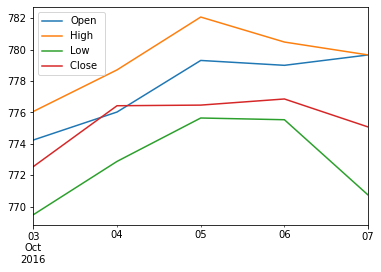

In [6]:
a.plot()

#### 2. Напишите программу Python для отображения сетки и построения линейных диаграмм конечной стоимости Alphabet Inc. в период с 3 октября 2016 года по 7 октября 2016 года. Настроены линии сетки со стилем линий -, шириной 0,5. и цвет синий.

In [7]:
fileSimulation = StringIO\
(
"Date, Closing Value\n\
03-10-16,772.559998\n\
04-10-16,776.429993\n\
05-10-16,776.469971\n\
06-10-16,776.859985\n\
07-10-16,775.080017"
)

a = pd.read_csv(filepath_or_buffer=fileSimulation, sep=',', index_col=0)
a

,Closing Value
Date,
03-10-16,772.559998
04-10-16,776.429993
05-10-16,776.469971
06-10-16,776.859985
07-10-16,775.080017


In [8]:
#convert index string to data type
a.index = pd.to_datetime(a.index)
a

,Closing Value
Date,
2016-03-10,772.559998
2016-04-10,776.429993
2016-05-10,776.469971
2016-06-10,776.859985
2016-07-10,775.080017


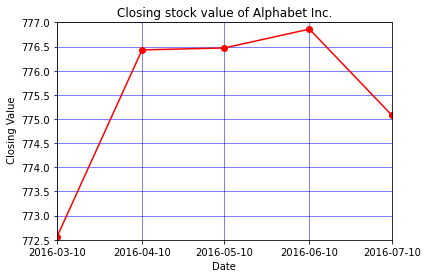

In [9]:
yPlotTicks = np.linspace(772.5, 777, 10)

fg, ax = plt.subplots()

ax.plot(a, 
        marker='o',
        color='red')

ax.grid(True)
ax.set(xlabel=a.axes[0].name,
        ylabel=a.axes[1][0],
        title="Closing stock value of Alphabet Inc.")
ax.set_yticks(yPlotTicks)
ax.set_xticks(a.index.values)
ax.set_xlim(a.index[0], a.index[-1])
ax.set_ylim(yPlotTicks[0], yPlotTicks[-1])
ax.grid(color='blue', linestyle='-', linewidth=0.5)

#### 3. Напишите программу Python для отображения гистограммы популярности языков программирования.

In [10]:
fileSimulation = StringIO\
(
"Languages: Java, Python, PHP, JavaScript, C#, C++\n\
Popularity: 22.2, 17.6, 8.8, 8, 7.7, 6.7"
)

a = pd.read_table(filepath_or_buffer=fileSimulation, sep="\s*[,:]\s*", index_col=0).T
a

C:\Users\leysh\AppData\Local\Temp\ipykernel_13148\246348756.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  a = pd.read_table(filepath_or_buffer=fileSimulation, sep="\s*[,:]\s*", index_col=0).T


Languages,Popularity
Java,22.2
Python,17.6
PHP,8.8
JavaScript,8.0
C#,7.7
C++,6.7


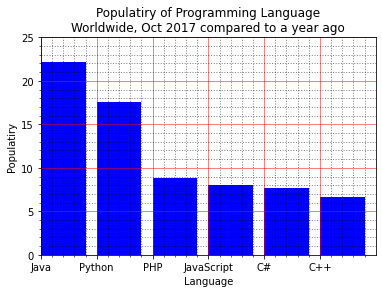

In [11]:
yPlotTicks = np.linspace(0, 25, 6)

fig, ax = plt.subplots()
a.plot(kind='bar', 
        ax=ax, 
        rot=0, 
        color='b',
        align='edge',
        width=0.8,
        legend=False
        )

ax.set(title="Populatiry of Programming Language\nWorldwide, Oct 2017 compared to a year ago",
        xlabel="Language",
        ylabel="Populatiry")

ax.set_xlim(0, 6)
ax.set_yticks(yPlotTicks)

ax.grid(which='major', color='r', linewidth=0.5)
ax.grid(which='minor', color='black', linestyle=':', linewidth=1, alpha=0.5)
ax.minorticks_on()

##### 3.1 Используя те же самые данные и тип диграммы: Раскрасьте столбцы разными цветами, сделайте их горизонтальными.

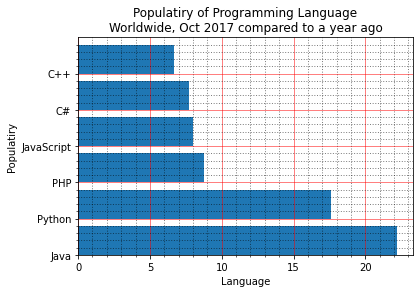

In [15]:
nSize = a.index.size
yPlotTicks = np.linspace(0, 25, nSize)

fig, ax = plt.subplots()
a.plot(kind='barh', 
        ax=ax, 
        rot=0, 
        align='edge',
        width=0.8,
        legend=False
        )

ax.set(title="Populatiry of Programming Language\nWorldwide, Oct 2017 compared to a year ago",
        xlabel="Language",
        ylabel="Populatiry")

ax.set_ylim(0, 6)
ax.set_xticks(yPlotTicks)

ax.grid(which='major', color='r', linewidth=0.5)
ax.grid(which='minor', color='black', linestyle=':', linewidth=1, alpha=0.5)
ax.minorticks_on()

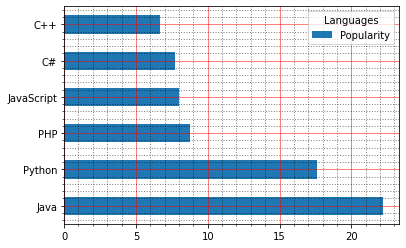

In [18]:
fig, ax = plt.subplots()
a.plot(kind='barh', ax=ax)
ax.grid(which='major', color='r', linewidth=0.5)
ax.grid(which='minor', color='black', linestyle=':', linewidth=1, alpha=0.5)
ax.minorticks_on()

#### 4. Напишите программу на Python, чтобы создать график столбиков стека и добавить меткук каждому разделу

In [ ]:
people = ('G1','G2','G3','G4','G5','G6','G7','G8')
segments = 4
# multi-dimensional data
data = [[ 3.40022085, 7.70632498, 6.4097905, 
10.51648577, 7.5330039, 7.1123587, 12.77792868, 
3.44773477],
[ 11.24811149, 5.03778215, 6.65808464, 12.32220677, 
7.45964195, 6.79685302, 7.24578743, 3.69371847],
[ 3.94253354, 4.74763549, 11.73529246, 4.6465543, 
12.9952182, 4.63832778, 11.16849999, 8.56883433],
[ 4.24409799, 12.71746612, 11.3772169, 9.00514257, 
10.47084185, 10.97567589, 3.98287652, 8.80552122]]
